In [1]:
# Add imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Read csv file into dataframe
df = pd.read_csv('/content/churn_clean.csv')

In [3]:
#Check columns of the dataset
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Rename survey questions 'Items1-8' with apporiate names
df.rename(columns= {'Item1': 'Timely response' , 
                    'Item2': 'Timely fixes', 
                    'Item3': 'Timely replacements', 
                    'Item4': 'Reliability', 
                    'Item5': 'Options',
                    'Item6': 'Respectful response', 
                    'Item7': 'Courteous exchange', 
                    'Item8': 'Evidence of active listening'}, inplace=True)

In [5]:
# Check if changes took place
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')

In [6]:
# Get total rows and columns
df.shape

(10000, 50)

In [7]:
# Drop unwanted columns that has no meaning to data
df = df.drop(columns=[
                 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
                 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 
                 'Job', 'Marital'])

In [8]:
#Check if columns have been dropped
df.columns

Index(['Children', 'Age', 'Income', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response',
       'Timely fixes', 'Timely replacements', 'Reliability', 'Options',
       'Respectful response', 'Courteous exchange',
       'Evidence of active listening'],
      dtype='object')

In [9]:
# Get data types on the dataset
df.dtypes

Children                          int64
Age                               int64
Income                          float64
Gender                           object
Churn                            object
Outage_sec_perweek              float64
Email                             int64
Contacts                          int64
Yearly_equip_failure              int64
Techie                           object
Contract                         object
Port_modem                       object
Tablet                           object
InternetService                  object
Phone                            object
Multiple                         object
OnlineSecurity                   object
OnlineBackup                     object
DeviceProtection                 object
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
PaperlessBilling                 object
PaymentMethod                    object
Tenure                          float64


In [10]:
# Get count for any nulls or empty columns
df.isnull().values.any()

False

In [11]:
# View statistics
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [12]:
# Count of people who churned or not churned
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


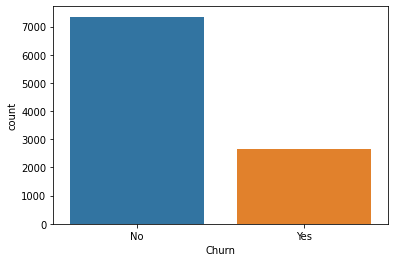

In [13]:
# Visualize th counts or churn
sns.countplot(df['Churn'])

In [14]:
# Check if model will be able to do better than guessing no all the time
# What is the chances of model being correct if guess no all the time
(7350-2650) / 7350 #Try to get a model accuracy higher than this

0.6394557823129252

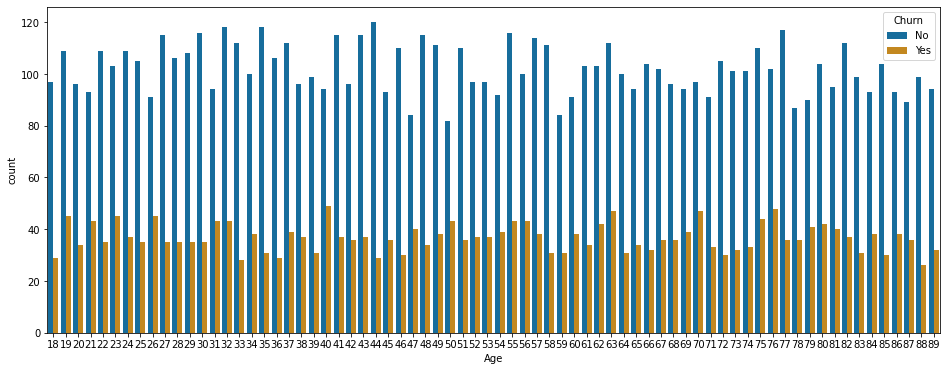

In [15]:
# Visualize count of different variables in dataset with churn
plt.subplots(figsize=(16,6))
sns.countplot(x='Age', hue='Churn', data= df, palette='colorblind')

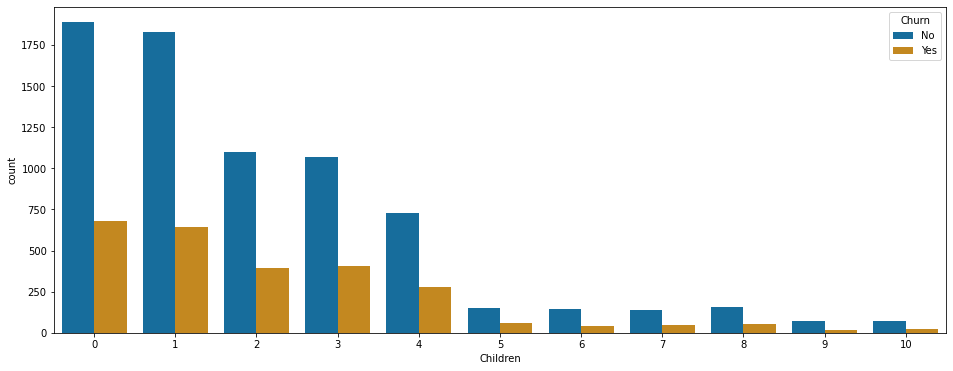

In [16]:
plt.subplots(figsize=(16,6))
sns.countplot(x='Children', hue='Churn', data= df, palette='colorblind')

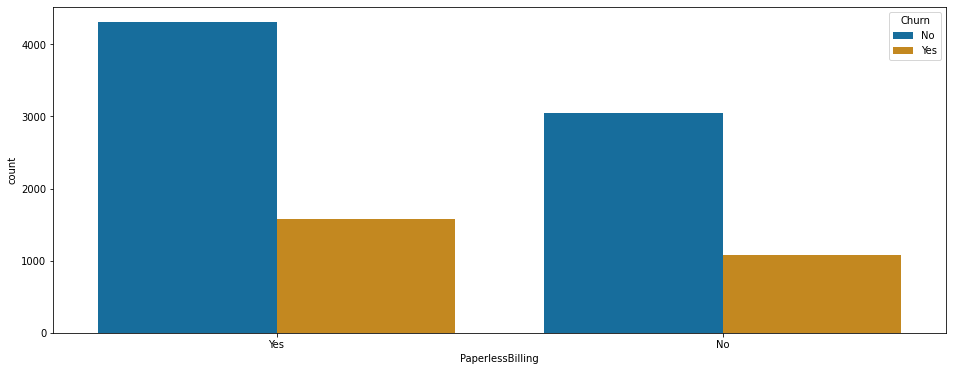

In [17]:
plt.subplots(figsize=(16,6))
sns.countplot(x='PaperlessBilling', hue='Churn', data= df, palette='colorblind')

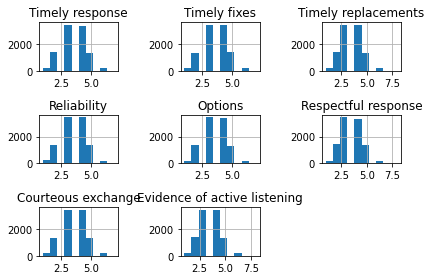

In [18]:
# Visualize histogram of survey questions 
df[['Timely response', 'Timely fixes', 'Timely replacements', 
    'Reliability', 'Options', 'Respectful response', 
    'Courteous exchange','Evidence of active listening']].hist()
plt.savefig('hist_survey_plt.jpg')
plt.tight_layout()

In [19]:
# Visualize scatterplot for corralation

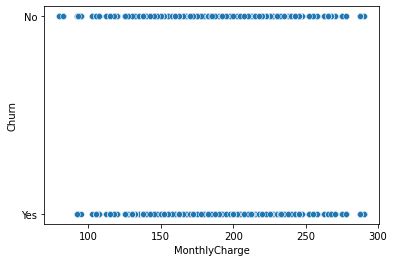

In [20]:
sns.scatterplot(x='MonthlyCharge', y='Churn', data= df)


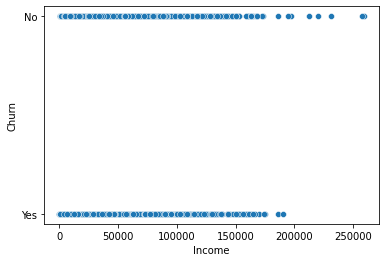

In [21]:
sns.scatterplot(x='Income', y='Churn', data= df)


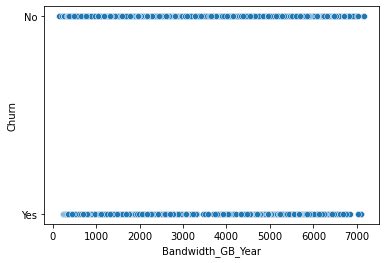

In [22]:
sns.scatterplot(x='Bandwidth_GB_Year', y='Churn', data= df)

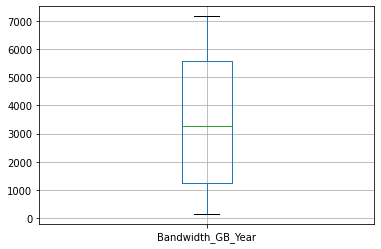

In [23]:
# Visualize boxplot for outliers 
df.boxplot(column=['Bandwidth_GB_Year'])

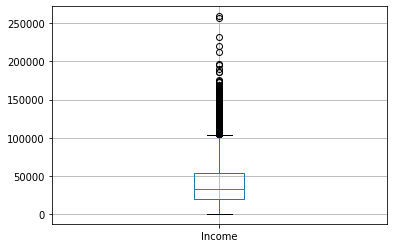

In [24]:
df.boxplot(column=['Income'])

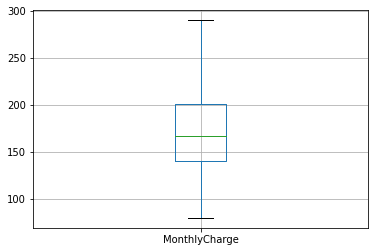

In [25]:
df.boxplot(column=['MonthlyCharge'])

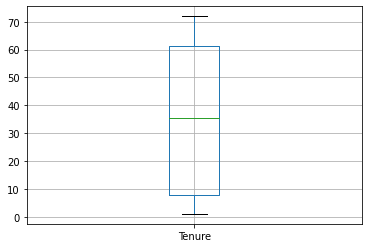

In [26]:
df.boxplot(column=['Tenure'])

In [27]:
# Print all object data type and their unique values
for column in df.columns:
  if df[column].dtypes == object:
    print(str(column) + ' : ' + str(df[column].unique()))
    print(df[column].value_counts())
    print('_________________________________________________')

Gender : ['Male' 'Female' 'Nonbinary']
Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64
_________________________________________________
Churn : ['No' 'Yes']
No     7350
Yes    2650
Name: Churn, dtype: int64
_________________________________________________
Techie : ['No' 'Yes']
No     8321
Yes    1679
Name: Techie, dtype: int64
_________________________________________________
Contract : ['One year' 'Month-to-month' 'Two Year']
Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64
_________________________________________________
Port_modem : ['Yes' 'No']
No     5166
Yes    4834
Name: Port_modem, dtype: int64
_________________________________________________
Tablet : ['Yes' 'No']
No     7009
Yes    2991
Name: Tablet, dtype: int64
_________________________________________________
InternetService : ['Fiber Optic' 'DSL' 'None']
Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dt

In [28]:
# See correlation 
df.corr()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
Children,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236
Age,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193
Income,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740
Outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126
Email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857
Contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859
Tenure,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.006246,0.003073,0.002351,-0.006714,0.024618,-0.010127,0.000410,-0.016347
MonthlyCharge,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,0.009756,0.003442,-0.008487,-0.000440,-0.005562,0.002943,-0.006399,0.002204
Bandwidth_GB_Year,0.025585,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000,-0.007314,0.003062,0.000978,-0.007789,0.025112,-0.010352,-0.001077,-0.015018


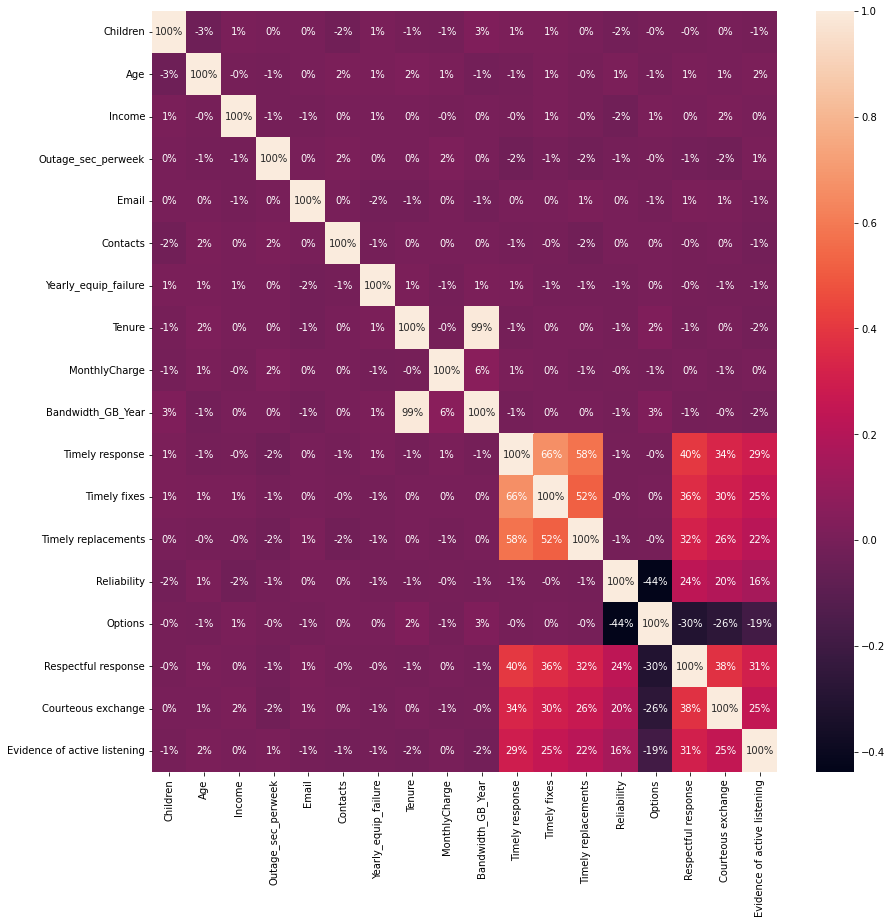

In [29]:
# Visualize the correlation 
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [30]:
# Save copy of dataset
df.to_csv('final_prepared_data.csv')

In [31]:
# Read in dataset to create model and transform data
num_df = pd.read_csv('/content/final_prepared_data.csv')


In [32]:
num_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
num_df

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,4,48,34129.34,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,1,48,45983.43,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,1,39,16667.58,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [33]:
# Move column Churn to front of file for splitting purposes
reorder = df['Churn']
num_df.drop(labels=['Churn'], axis=1, inplace = True)
num_df.insert(0,'Churn', reorder)
num_df

,Churn,Children,Age,Income,Gender,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,No,0,68,28561.99,Male,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,Yes,1,27,21704.77,Female,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,No,4,50,9609.57,Female,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,No,1,48,18925.23,Male,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,Yes,0,83,40074.19,Male,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,3,23,55723.74,Male,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,No,4,48,34129.34,Male,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,No,1,48,45983.43,Female,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,No,1,39,16667.58,Male,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [34]:
#Transform the data
# Make non numerical columns numerical
for column in num_df.columns:
  if num_df[column].dtype == np.number:
    continue
  num_df[column] = LabelEncoder().fit_transform(num_df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [35]:
num_df

,Churn,Children,Age,Income,Gender,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,0,50,28561.99,1,7.978323,9,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,6.795513,172.455519,904.536110,4,4,4,2,3,3,2,3
1,1,1,9,21704.77,0,11.699080,11,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1.156681,242.632554,800.982766,2,3,2,2,3,2,3,3
2,0,4,32,9609.57,0,10.752800,8,0,1,1,2,1,0,0,1,1,0,0,0,0,0,1,1,1,15.754144,159.947583,2054.706961,3,3,1,3,3,2,2,2
3,0,1,30,18925.23,1,14.913540,14,2,0,1,2,0,0,0,1,0,1,0,0,0,1,0,1,3,17.087227,119.956840,2164.579412,3,3,3,1,4,3,2,2
4,1,0,65,40074.19,1,8.147417,15,2,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,3,1.670972,149.948316,271.493436,3,3,3,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,3,5,55723.74,1,9.415935,11,2,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,2,68.197130,159.979400,6511.252601,2,1,2,2,3,2,1,2
9996,0,4,30,34129.34,1,6.740547,14,2,0,0,2,0,0,1,1,1,1,1,1,0,1,0,0,2,61.040370,207.481100,5695.951810,3,4,4,3,3,4,1,4
9997,0,1,30,45983.43,0,6.590911,9,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,47.416890,169.974100,4159.305799,3,3,3,3,3,3,3,4
9998,0,1,21,16667.58,1,12.071910,13,1,0,0,2,0,1,1,0,1,0,0,0,1,1,1,1,1,71.095600,252.624000,6468.456752,3,3,5,3,2,2,4,3


In [36]:
# Split data
X = num_df.iloc[:,1:df.shape[1]].values
Y = num_df.iloc[:,0].values

In [37]:
# Split into 30 percent testing and 70 percent training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)


In [38]:
# Create function for confusion matrix
def confusion_matrix_diagram(Y_test, y_pred):
  plt.matshow(confusion_matrix(Y_test, y_pred))
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.grid(b=None)
  plt.show()


# KNN function for default values
def get_knn_mod(Y_train, X_train, X_test):
  model = KNeighborsClassifier(n_jobs=-1)
  model.fit(X_train, Y_train)
  print(model.get_params())
  y_pred = list(map(round, model.predict(X_test)))
  arr = np.c_[y_pred, Y_test]
  print('\nPredicted and Actual Values', arr)
  print('-----------------------------------------------------------------------')
  print('Confusion Matrix \n', confusion_matrix(Y_test,y_pred))
  print('-----------------------------------------------------------------------')
  print('Accuracy Score: ', accuracy_score(Y_test, y_pred))
  print('-----------------------------------------------------------------------')
  confusion_matrix_diagram(Y_test, y_pred)
  print('-----------------------------------------------------------------------')
  print(classification_report(Y_test, y_pred))
  print('-----------------------------------------------------------------------')
  return model, arr

# Auc chart and score function
def roc(model, X_test, Y_test):
  probs = model.predict_proba(X_test)
  fpr, tpr, _  = roc_curve(Y_test, probs[:,1])
  plt.plot(fpr,tpr,marker='.')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  print('-----------------------------------------------------------------------')
  print('AUC: %.3f' % roc_auc_score(Y_test, probs[:,1]))


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Predicted and Actual Values [[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
-----------------------------------------------------------------------
Confusion Matrix 
 [[1843  358]
 [ 467  332]]
-----------------------------------------------------------------------
Accuracy Score:  0.725
-----------------------------------------------------------------------


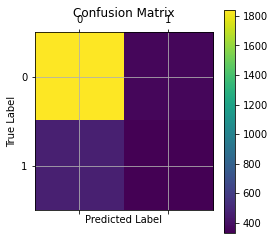

-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2201
           1       0.48      0.42      0.45       799

    accuracy                           0.73      3000
   macro avg       0.64      0.63      0.63      3000
weighted avg       0.71      0.72      0.72      3000

-----------------------------------------------------------------------


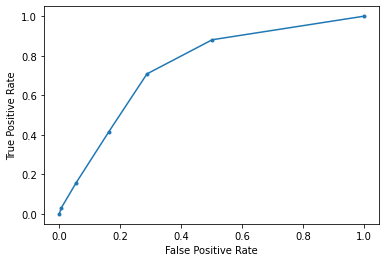

-----------------------------------------------------------------------
AUC: 0.744



In [39]:
#Initial k neighbors model
model_knn, arr_knn = get_knn_mod(Y_train, X_train, X_test)
roc(model_knn, X_test,Y_test)
print()

<bound method BaseEstimator.get_params of KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=17, p=1)>
accuracy
-----------------------------------------------------------------------

Predicted and Actual Values [[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
-----------------------------------------------------------------------
Confusion Matrix 
 [[1895  306]
 [ 458  341]]
-----------------------------------------------------------------------
Accuracy Score:  0.7453333333333333
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2201
           1       0.53      0.43      0.47       799

    accuracy                           0.75      3000
   macro avg       0.67      0.64      0.65      3000
weighted avg       0.73      0.75      0.74      3000



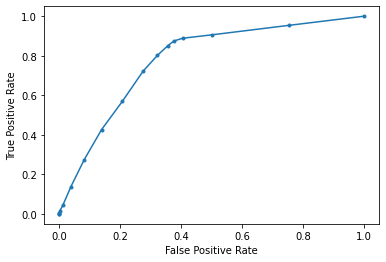

-----------------------------------------------------------------------
AUC: 0.778


In [60]:
#Tuning the parameters for comparison to get the best accuracy scor
#Tune leaf size rance was 1 to 100
#n_neighbor rane was 10 to 100
#Reduce the size of range since takes awhile to load
param_tune = {'leaf_size':list(range(1,2)), 'n_neighbors': list(range(17,19)), 'weights':['uniform', 'distance']}

from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1, p=1)
gsc = GridSearchCV(estimator = knn, param_grid=param_tune, scoring ='accuracy', cv=5)
model_gsc = gsc.fit(X_train, Y_train)
print(model_gsc.best_estimator_.get_params)
print(model_gsc.scoring)
y_pred = list(map(round, model_gsc.best_estimator_.predict(X_test)))
arr = np.c_[y_pred, Y_test]
print('-----------------------------------------------------------------------')
print('\nPredicted and Actual Values', arr)
print('-----------------------------------------------------------------------')
print('Confusion Matrix \n', confusion_matrix(Y_test,y_pred))
print('-----------------------------------------------------------------------')
print('Accuracy Score: ', accuracy_score(Y_test, y_pred))
print('-----------------------------------------------------------------------')
print(classification_report(Y_test, y_pred))

roc(model_gsc.best_estimator_, X_test, Y_test)